In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score

In [51]:
df = pd.read_csv('C:/Users/dikog/Downloads/WarehouseData.csv')

# Encode categorical variables
label_encoders = {}
for column in ['Priority', 'Product_Type', 'Location', 'Size']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [52]:
# Define features and target (for this example, we'll predict 'Priority')
X = df[['Order_Quantity', 'Product_Type', 'Location', 'Weight', 'Size']]
y = df['Priority']



In [53]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [54]:
# Build and train the model
mlp = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=1000, random_state=42)
mlp.fit(X_train_scaled, y_train)

C:\Users\dikog\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=1000, random_state=42)

In [55]:
# Test the model
y_pred = mlp.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

# Display the model performance

              precision    recall  f1-score   support

           0       0.95      0.79      0.86       199
           1       0.79      0.57      0.66       115
           2       0.65      0.96      0.77       136

    accuracy                           0.78       450
   macro avg       0.80      0.77      0.76       450
weighted avg       0.82      0.78      0.78       450

Accuracy: 0.7844444444444445


C:\Users\dikog\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


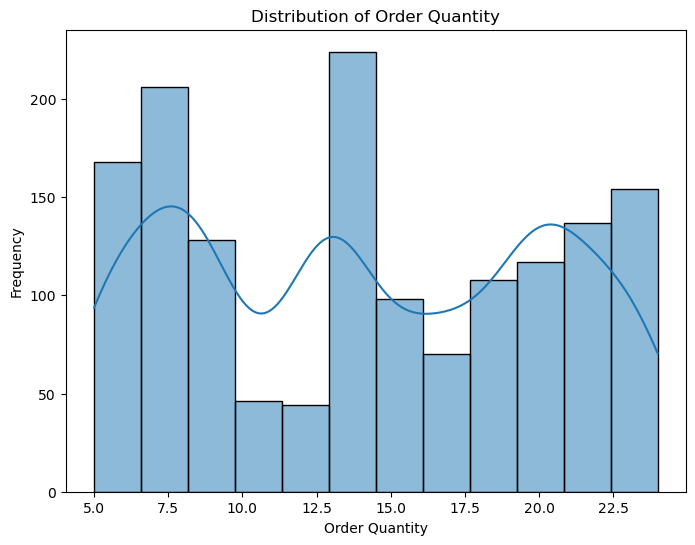

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distribution of Order Quantity
plt.figure(figsize=(8, 6))
sns.histplot(df['Order_Quantity'], kde=True)
plt.title('Distribution of Order Quantity')
plt.xlabel('Order Quantity')
plt.ylabel('Frequency')
plt.show()

C:\Users\dikog\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


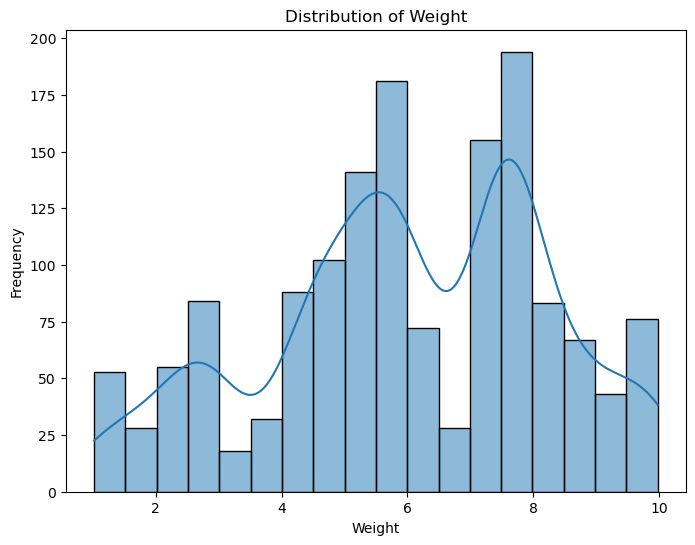

In [61]:
# Visualize the distribution of Weight
plt.figure(figsize=(8, 6))
sns.histplot(df['Weight'], kde=True)
plt.title('Distribution of Weight')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()

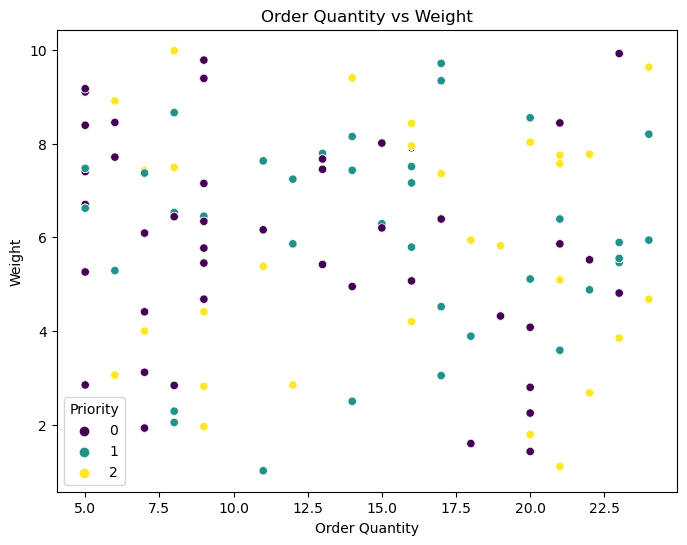

In [62]:
# Visualize the relationship between Order Quantity and Weight
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Order_Quantity', y='Weight', hue='Priority', palette='viridis')
plt.title('Order Quantity vs Weight')
plt.xlabel('Order Quantity')
plt.ylabel('Weight')
plt.legend(title='Priority')
plt.show()